In [330]:
import sys
sys.path.append("/Users/maithoma/work/github/bayesLearn/scripts/")
from Entro import *
%matplotlib inline

try:
    reload(bayesLib)
except:
    import bayesLib

from bayesLib import *

In [331]:
reload(bayesLib)

<module 'bayesLib' from '/Users/maithoma/work/github/bayesLearn/scripts/bayesLib.pyc'>

### [in fact, at each submission, we observe the outcome of a (multiplicative?) process which leads to a power law distribution of coarse-grained increments between k and k+1]


In [2]:
simplName = "simpleConvergenceMeans"
complName = "complexConvergenceMeans"

In [333]:
distances = {}
distances["simple"] = loadDistances(treatment="simple",distanceType='sqrt',remove_duplicates=False)
distances["complex"] = loadDistances(treatment="complex",distanceType='sqrt',remove_duplicates=False)

In [375]:
digits = 2
approxTrueG =np.floor(np.array(trueG)*10**digits)/10**digits
print trueG
print approxTrueG
approxTrueGup = approxTrueG + 10**-digits
print approxTrueGup
print np.sqrt(np.sum((np.array(trueG) - approxTrueG)**2))
print np.sqrt(np.sum((np.array(trueG) - approxTrueGup)**2))
print np.sqrt(np.sum((approxTrueGup - approxTrueG)**2))

[0.0625, 0.0625, 0.0, 0.125, 0.140625, 0.046875, 0.03125, 0.03125, 0.0, 0.0, 0.0, 0.25, 0.09375, 0.03125, 0.0625, 0.0625]
[ 0.06  0.06  0.    0.12  0.14  0.04  0.03  0.03  0.    0.    0.    0.25
  0.09  0.03  0.06  0.06]
[ 0.07  0.07  0.01  0.13  0.15  0.05  0.04  0.04  0.01  0.01  0.01  0.26
  0.1   0.04  0.07  0.07]
0.0107891728135
0.0334126660116
0.04


In [374]:
def msd(V,n):
    '''Mean Square Distance'''
    return 1/float(n)*np.sum(np.sum((V[1:n]-V[0])**2,0))

In [373]:
treatment = "complex"
treatment_dic = pd.read_pickle(dir + "Data/%s_models"%treatment)

with open(dir + 'Data/%sG'%treatment, 'r') as f:
    trueG = jp.decode(f.read())['probs']

In [376]:
I = []
INDEX = []
steps = []
dDsquared = []
dDiversity = []
minJSD = []
slope = []
dScore = []
Score = []
Divergence = []
dDivergence = []

sqrtDistance = []
jsdDistance = []

stepDistance = []

plot = False

correlation = []
p_corr = []
minScore = []
iMinScore = []
finalScore = []

Displacement = []

SiteExpl = []
FirstVisit = []
VisitationFreq = []
MSD = []

for k,key in enumerate(treatment_dic.keys()[:]):
    V = []
    index = []
    stepwise_distance = []
    
    jsd = distances[treatment][key]
    
    cond = np.logical_not(np.isnan(jsd))
    minJSD.append(jsd[cond].values[-1])
    
    for i,v in enumerate(treatment_dic[key]):
        
        if not isinstance(v, list):continue # skip NaNs
        
        try:
            if not list(v)==V[-1]:
                V.append(list(v))
                index = np.append(index,i)
        except:
            V.append(list(v))
            index = np.append(index,i)
            
  
        dst = np.sqrt(np.sum((np.array(v) - np.array(trueG))**2))
        sqrtDistance.append(dst)
        jsdDistance.append(jsd[i])

    distance = []
    divergence = [1]
    nPointDiversity = []
    nPointJSD = []
    score = []
    
    
    # Unique and count Visitations  
    V2 = {}
    site_expl = []
    k = 0

    
    
    for i,v in enumerate(V):
        #distance = np.append(distance,Distance(V[i-1],v))
        #divergence = np.append(divergence,KL_divergence(V[i-1],v))
        #M = MixedN(V[:-1])
        #if M == None:
        #    M = V[i]

        if i>0:
            M = MixedN(V[:i])
            divergence = np.append(divergence,JensenShannonDivergence(v,M))
            #if len(JensenShannonDivergence(v,M))>1:
            #print len(divergence),JensenShannonDivergence(v,M)
            
            d = np.sqrt(np.sum((np.array(v) - np.array(V[i - 1]))**2))
            d2 = np.sum((np.array(v) - np.array(V[i - 1]))**2)
            #if d2 > 1:
            #    print k,i,d2,np.array(v) - np.array(V[i - 1])
            
            Displacement = np.append(Displacement,d)
            
        
        nPointDiversity = np.append(nPointDiversity,Diversity(V[:i]))
        score = np.append(score,distances[treatment][key][index[i]])
        
        
        
        try:
            nPointJSD = np.append(nPointJSD,N_point_JSD(V[:i]))
        except:
            continue


        stepwise_dst = []
        for j,jx in enumerate(V[:i]):

            dst = Distance(np.round(v,10),np.round(jx,10))
            stepwise_dst = np.append(stepwise_dst,dst)

        o = np.argsort(stepwise_dst)
        #if len(o) > 0:
        #    I = np.concatenate([I,o[:]])
        #    memory.append((i - o[:10])[0])
        #    if i == 224:
        #        print i,o[:10],np.round(distances[o][:5],5)
    
        stepwise_distance = np.append(stepwise_distance,i-o[0])
    
    
        # Unique and count Visitations      
        digits = 1
        unit = "%s"%digits
        b = list(np.floor(np.array(v)*10**digits)/10**digits)
        b_str = ",".join(["%s"%np.round(r,digits) for r in b])
    
        try: 
            V2[b_str].append(i)
        except:
            V2[b_str] = [i]
            k += 1
            site_expl.append((i,k))
            SiteExpl.append((i,k))

    
    VisitationFreq = np.concatenate([VisitationFreq,[len(np.argwhere(np.diff(r)>1))+1 for r in V2.values()]])
    FirstVisit = np.concatenate([FirstVisit,np.sort([r[0] for r in V2.values()])])
    
    
    msquaredistance = np.array([msd(np.array(V),k) for k in range(1,len(V)+1)])
    MSD = np.concatenate([MSD,msquaredistance/float(msquaredistance[-1])])
    
    diffDsquared = np.diff(nPointDiversity)**2
    diffDiversity = np.diff(nPointDiversity)
    diffScore = np.diff(score)
    diffDivergence = np.diff(divergence)
    
    INDEX = np.concatenate([INDEX,index])
    I = np.concatenate([I,index[:-1]])
    steps = np.concatenate([steps,range(len(index[:-1]+1))])
    dDsquared = np.concatenate([dDsquared,diffDsquared])
    dDiversity = np.concatenate([dDiversity,diffDiversity])
    dScore = np.concatenate([dScore,diffScore])
    Score = np.concatenate([Score,score[1:]])
    Divergence = np.concatenate([Divergence,divergence[1:]])
    dDivergence = np.concatenate([dDivergence,diffDivergence])

    stepDistance = np.concatenate([stepDistance,stepwise_distance])
    
    x = divergence
    y = score
    
    corr = S.spearmanr(score,divergence)
    
    correlation = np.append(correlation,corr[0])
    p_corr = np.append(p_corr,corr[1])
    minScore = np.append(minScore,min(score))
    iMinScore = np.append(iMinScore,np.argmin(score))
    finalScore = np.append(finalScore,score[-1])

    #print "%s : %.2f (p=%.2f),min score: %.2f, final score: %.2f"%(k,corr[0],corr[1],min(score),score[-1])
    #pl.figure(1)
    #pl.plot(len(score),min(score),'o')
    
    if plot:
        pl.figure(k+2,(13,7))
        pl.subplot(121)
        pl.plot(x,y,'.-',lw=0.5)
        pl.plot(x[0],y[0],'co',ms=10)
        pl.plot(x[-1],y[-1],'r^',ms=10)
        pl.plot(x[np.argmin(score)],y[np.argmin(score)],'gs',ms=10)
        pl.xlabel("divergence")
        pl.ylabel("score")

        #x = diffDivergence
        #y = diffScore

        pl.subplot(122)
        cond = (index > 0)*(x > 0)
        lx = np.log10(index[cond])
        ly = np.log10(x[cond])
        B = binning(lx,ly,30)
        pl.plot(B['bins'],B['mean'],'ro')
        pl.plot(lx[np.argmin(score)],ly[np.argmin(score)],'gs',ms=10)
        pl.plot(lx[-1],ly[-1],'r^',ms=10)
        #pl.plot(x[1],y[1],'co',ms=10)
        #pl.plot(x[-1],y[-1],'r^',ms=10)
        #pl.plot(x[np.argmin(score)],y[np.argmin(score)],'gs',ms=10)
        #pl.xlabel("$\Delta divergence$")
        #pl.ylabel("$\Delta score$")
        
    

LinregressResult(slope=-0.2397938855801327, intercept=-1.0696769078577102, rvalue=-0.20914509397101991, pvalue=2.7440869050496899e-16, stderr=0.028968241494697265)


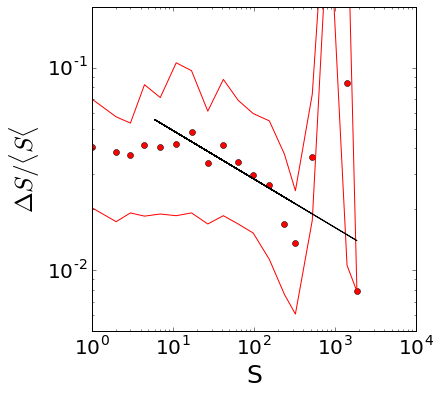

In [377]:
index = np.argwhere(FirstVisit == 1).flatten()

X = []
Y = []

for i,ix in enumerate(index[:-1]):
    x = FirstVisit[ix:index[i+1]][:-1]
    #print np.mean(x),max(x)
    y = np.diff(FirstVisit[ix:index[i+1]])
    X = np.append(X,x)#/float(x[-1]))
    Y = np.append(Y,y/np.mean(x))


cond = X < 10**5
lx = np.log10(X[cond])
ly = np.log10(Y[cond])

B = binning(lx,ly,20,confinter=25)

cond = lx > np.log10(5)
fit = S.linregress(lx[cond],ly[cond])
#fit = S.linregress(B['bins'],B['mean'])
print fit

#pl.loglog(10**lx,10**ly,'.')
pl.loglog(10**B['bins'],10**B['mean'],'ro')
#pl.loglog(10**B['bins'],10**(B['mean'] + B['stdDev']/B['nPoints']),'r-')
#pl.loglog(10**B['bins'],10**(B['mean'] - B['stdDev']/B['nPoints']),'r-')
pl.loglog(10**B['bins'],10**B['percUp'],'r-')
pl.loglog(10**B['bins'],10**B['percDown'],'r-')
pl.loglog(10**lx[cond],10**(lx[cond]*fit[0] + fit[1]),'k-',lw=1)

pl.xlabel("S")
pl.ylabel("$\Delta S/\langle S \langle$")
pl.ylim(0.005,.2)
#pl.xlim(xmax=700)
pl.savefig(dir + "Figures/ds_vs_S_%s.eps"%treatment)

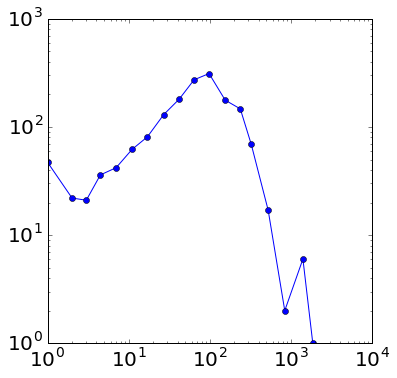

In [378]:
pl.loglog(10**B['bins'],B['nPoints'],'o-')

In [379]:
f = np.array([])
PI = np.array([])

for v,vx in enumerate(np.sort(np.unique(VisitationFreq))):
    f = np.append(f,len(np.argwhere(VisitationFreq==vx)))
    PI = np.append(PI,len(np.argwhere(VisitationFreq >= vx)))
        
#f = np.array(f)/np.sum(f)
PI = np.array(PI)/np.sum(PI)

2.66144406257 0.122398012272 267


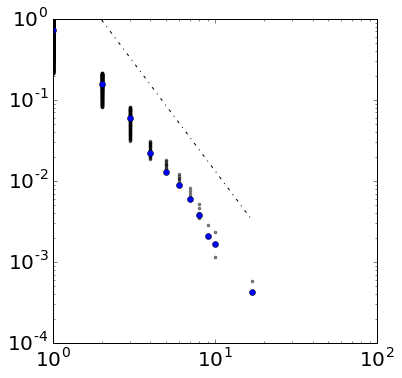

In [380]:
fitdic = plotPowerLawFit(VisitationFreq,xmin=2,continuousFit=True,addnoise=True,confint=.01,plot=True)
pl.loglog(np.sort(np.unique(VisitationFreq)),PI,'o')

LinregressResult(slope=0.92560287510084438, intercept=-2.972861916409828, rvalue=0.97818571633412643, pvalue=1.8972668269768031e-07, stderr=0.065521847156673058)


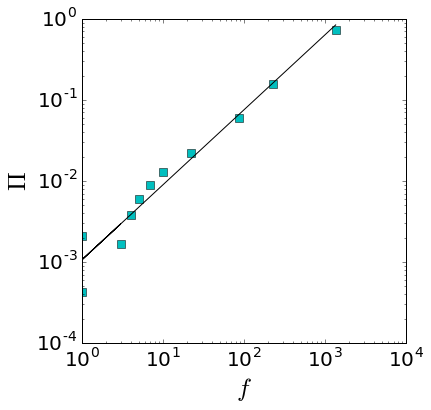

In [381]:
cond = (f > 0)*(PI > 0)
lx = np.log10(f[cond])
ly = np.log10(PI[cond])
fit = S.linregress(lx,ly)
print fit
#pl.figure(1,(7,6))
pl.loglog(f,PI,'cs',ms=8)
pl.loglog(10**(lx),10**(lx*fit[0] + fit[1]),'k-')
pl.xlabel("$f$")
pl.ylabel("$\Pi$")
#pl.xlim(xmax=2500)

LinregressResult(slope=1.4624601440503946, intercept=-4.8075484934423587, rvalue=0.17249030120671088, pvalue=6.7862209427014913e-74, stderr=0.079812939581181769)


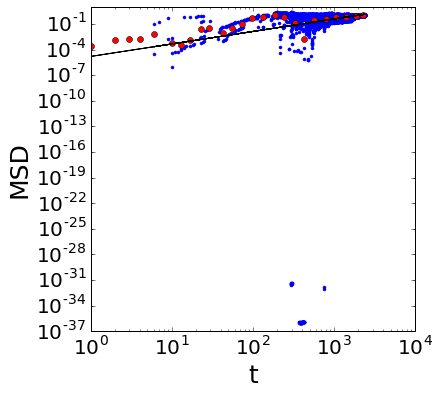

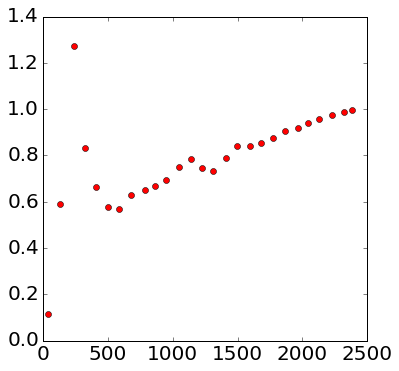

In [382]:
x = INDEX
y = MSD

cond = (x > 0)*(y > 0)
lx = np.log10(x[cond])
ly = np.log10(y[cond])

B = binning(lx,ly,30)

fit = S.linregress(lx,ly)
print fit

pl.loglog(10**lx,10**ly,'.')
pl.loglog(10**B['bins'],10**B['mean'],'ro')
pl.loglog(10**lx,10**(lx*fit[0]+ fit[1]),'k-')
pl.xlabel("t")
pl.ylabel("MSD")

pl.figure(2)
B = binning(x,y,30)
pl.plot(B['bins'],B['mean'],'ro')

2.4959858421 0.125491161028 254


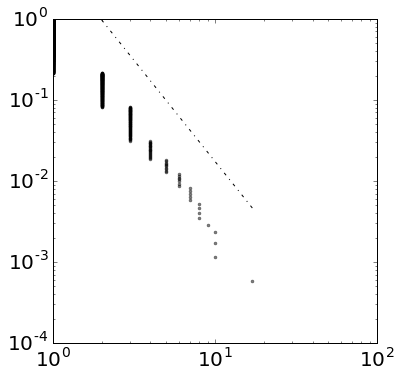

In [383]:
x,y = rankorder(VisitationFreq)
#pl.loglog(x,y,'o')
fitdic = plotPowerLawFit(VisitationFreq,xmin=2,continuousFit=True,addnoise=True,confint=.01,plot=True)

LinregressResult(slope=0.75344229336336621, intercept=-0.0052039293427594835, rvalue=0.99308570160167897, pvalue=6.6188102210532152e-23, stderr=0.018571047207030542)


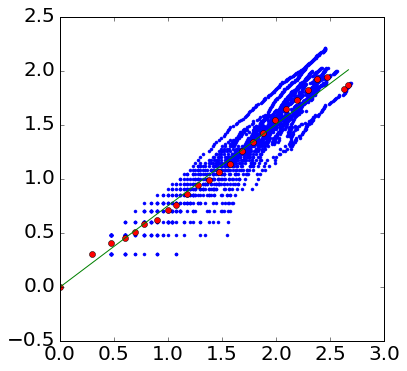

In [372]:
x,y = np.array(zip(*SiteExpl))
cond = (x > 0)*(y > 0)
lx = np.log10(x[cond])
ly = np.log10(y[cond])
pl.plot(lx,ly,'.')
B = binning(lx,ly,30)
pl.plot(B['bins'],B['mean'],'ro')
fit = S.linregress(B['bins'],B['mean'])
print fit
pl.plot(B['bins'],B['bins']*fit[0]+ fit[1])

In [ ]:
d = len(V[0])
test = np.array(V)
bins = np.arange(0,1.01,0.3)
bins[-1] += 0.001
H,edges = np.histogramdd(test,bins = [bins]*d,range=[[0,1]]*d)

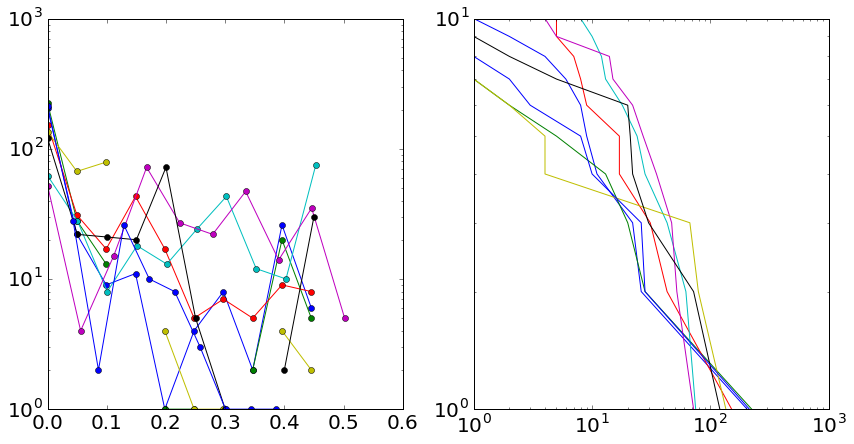

In [919]:
H = np.zeros([test.shape[1],len(bins)-1])

for i in range(test.shape[1]):
    h = np.histogram(test[:,i],bins=10)
    H[i] = h[0]


    pl.figure(1,(14,7))
    pl.subplot(121)
    x = h[1][:-1]
    y = h[0]
    #pl.bar(x,y,width=bins[1])
    pl.semilogy(x,y,'o-')
    pl.subplot(122)
    #fitdic = plotPowerLawFit(y,xmin=10,continuousFit=True,addnoise=True,confint=.01,plot=True)
    x,y = rankorder(y)
    pl.loglog(x,y,'-')

0.654099434974 0.0354830863608 3177
1.0517820374 10951


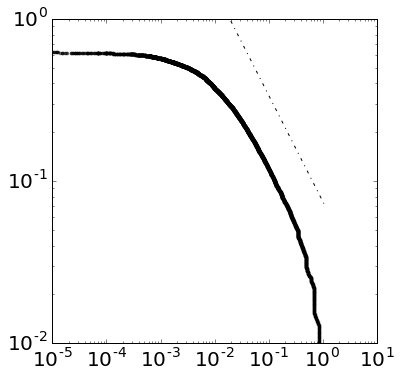

In [385]:
fitdic = plotPowerLawFit(Displacement,xmin=0.02,continuousFit=True,addnoise=False,confint=.01,plot=True)
pl.xlim(xmin=0.00001)
pl.ylim(ymin=0.01)
print max(Displacement),len(Displacement)

LinregressResult(slope=0.0040282163703809363, intercept=-0.0017180322912125436, rvalue=0.058388041707456824, pvalue=9.6766609334962527e-10, stderr=0.0006582033637402095)


(1, 1000.0)

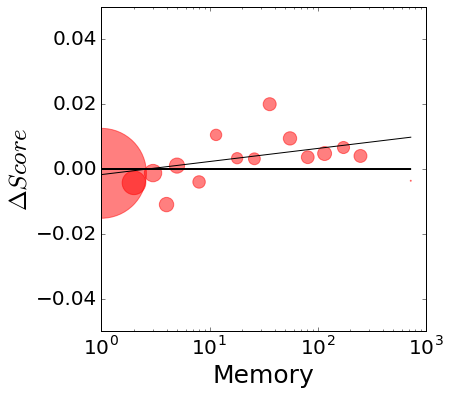

In [389]:
fit = S.linregress(np.log10(stepDistance),dScore)
print fit
B = binning(np.log10(stepDistance),dScore,20,confinter=10)
#fit = S.linregress(B['bins'],B['mean'])
#print fit
pl.scatter(10**B['bins'],B['mean'],s=B['nPoints'],color="red",alpha=0.5)
pl.plot(10**B['bins'],(B['bins']*fit[0] + fit[1]),'k-')
#pl.semilogx(10**B['bins'],B['percUp'],'r-')
#pl.semilogx(10**B['bins'],B['percDown'],'r-')
#pl.semilogx(10**B['bins'],B['percUp'] + B['percDown'],'m-')
xZero = stepDistance
yZero = np.zeros_like(xZero)

pl.semilogx(xZero,yZero,'k-')
pl.xlabel("Memory")
pl.ylabel("$\Delta Score$")
pl.ylim(-0.05,0.05)
pl.xlim(xmin=1)

LinregressResult(slope=0.7628324931385787, intercept=0.21186111681574021, rvalue=0.54289782677657217, pvalue=6.6990991066866575e-05, stderr=0.17398323085287118)


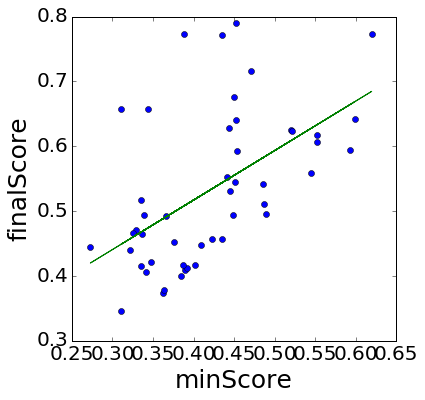

In [174]:
fit = S.linregress(minScore,finalScore)
print fit
pl.plot(minScore,finalScore,'o')
pl.plot(minScore,minScore*fit[0] + fit[1])
pl.xlabel("minScore")
pl.ylabel("finalScore")

LinregressResult(slope=-1.8361114094245579, intercept=0.97474167336096718, rvalue=-0.26374649791535121, pvalue=0.11472253013978305, stderr=1.1350682472338098)


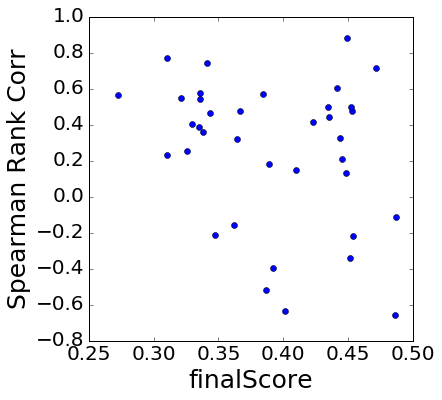

In [204]:
cond = (p_corr < 0.1)*(minScore < 0.5)
#pl.plot(finalScore[cond],correlation[cond],'o')
fit = S.linregress(minScore[cond],correlation[cond])
print fit
pl.plot(minScore[cond],correlation[cond],'o')
pl.xlabel("finalScore")
pl.ylabel("Spearman Rank Corr")


SpearmanrResult(correlation=0.14282396838863301, pvalue=5.3121917614717494e-51)


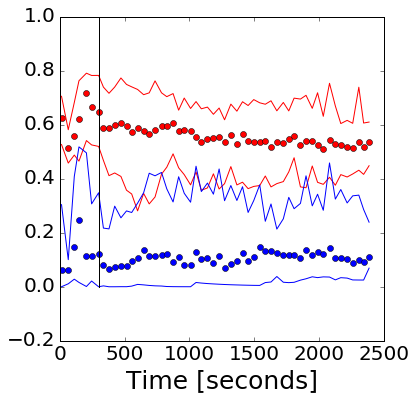

In [540]:
B = binning(I,Score,60,confinter=5)

pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')

B = binning(I,Divergence,60,confinter=5)

pl.plot(B['bins'],B['mean'],'bo')
pl.plot(B['bins'],B['percUp'],'b-')
pl.plot(B['bins'],B['percDown'],'b-')
yStart = np.linspace(0,1,10)
xStart = np.zeros_like(yStart) + 60*5
pl.plot(xStart,yStart,'k-')
pl.xlabel("Time [seconds]")

pl.savefig(dir + "Figures/decay_score_divergence_%s_linlin.eps"%treatment)

print S.spearmanr(Score,Divergence)

LinregressResult(slope=-0.087009473161094975, intercept=0.0050535734722944592, rvalue=-0.20454052878298568, pvalue=1.3402298005506921e-89, stderr=0.0042888729782692434)
LinregressResult(slope=0.82939308726184413, intercept=-3.8380237146841023, rvalue=0.23028519613287374, pvalue=1.1098147024794613e-113, stderr=0.036103106389178269)
300


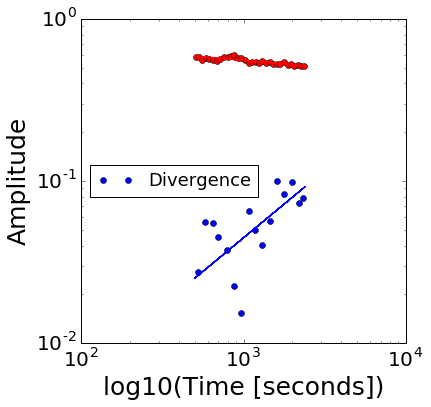

In [541]:
minT = 500
cond = (I > minT)*(Score > 0)
lx = np.log10(I[cond])
ly = np.log10(Score[cond])
fit = S.linregress(lx,ly)
print fit

B = binning(lx,ly,60,confinter=5)
pl.loglog(10**(B['bins']),10**(B['mean']),'ro',label="")
pl.loglog(10**(lx),10**(lx*fit[0]+fit[1]),'r-')

cond = (I > 0)*(I > minT)*(Divergence > 0)
lx = np.log10(I[cond])
ly = np.log10(Divergence[cond])
fit = S.linregress(lx,ly)
print fit

B = binning(lx,ly,30,confinter=5)
pl.loglog(10**(B['bins']),10**(B['mean']),'bo',label="Divergence")
#pl.loglog(10**(B['bins']),10**(B['percUp']),'b-')
#pl.loglog(10**(B['bins']),10**(B['percDown']),'b-')
pl.loglog(10**(lx),10**(lx*fit[0]+fit[1]),'b-')

print 60*5

#pl.xlim(50,2600)
#pl.ylim(ymin = 0.03)
pl.xlabel("log10(Time [seconds])")
pl.ylabel("Amplitude")
pl.legend(loc=0)
pl.savefig(dir + "Figures/decay_score_divergence_%s_loglog.eps"%treatment)

LinregressResult(slope=-0.020597809834391145, intercept=-0.21518896075395005, rvalue=-0.16744117894971924, pvalue=4.3781125086407117e-69, stderr=0.0011641497169029371)
LinregressResult(slope=-0.12973496305229398, intercept=-0.99941593378671256, rvalue=-0.088527274434032896, pvalue=1.7789835758624477e-16, stderr=0.015720538779572572)


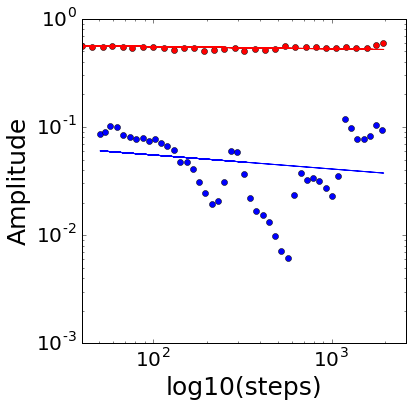

In [542]:
cond = (steps > 1)*(Score > 0)
lx = np.log10(steps[cond])
ly = np.log10(Score[cond])
fit = S.linregress(lx,ly)
print fit

B = binning(lx,ly,60,confinter=5)
pl.loglog(10**(B['bins']),10**(B['mean']),'ro')
pl.loglog(10**(lx),10**(lx*fit[0]+fit[1]),'r-')

cond = (steps > 50)*(Divergence > 0)
lx = np.log10(steps[cond])
ly = np.log10(Divergence[cond])
fit = S.linregress(lx,ly)
print fit

B = binning(lx,ly,60,confinter=5)

pl.loglog(10**(B['bins']),10**(B['mean']),'bo')
pl.loglog(10**(lx),10**(lx*fit[0]+fit[1]),'b-')

pl.xlim(40,2600)
#pl.ylim(ymin = 0.03)
pl.xlabel("log10(steps)")
pl.ylabel("Amplitude")

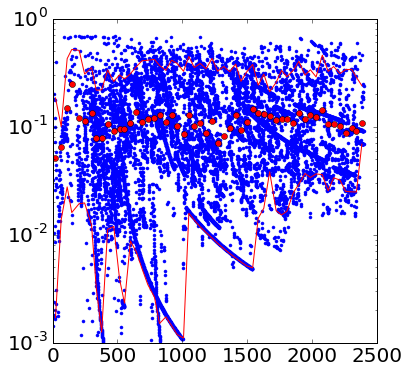

In [543]:
cond = (I > 0)*(Divergence > 0.001)
B = binning(I[cond],Divergence[cond],60,confinter=5)
pl.semilogy(I[cond],Divergence[cond],'.')
pl.semilogy(B['bins'],B['mean'],'ro')
pl.semilogy(B['bins'],B['percUp'],'r-')
pl.semilogy(B['bins'],B['percDown'],'r-')

#pl.ylim(ymin=0.01)
#pl.xlim(xmin=5*60)

LinregressResult(slope=0.031782403037222191, intercept=-0.0038694780911102426, rvalue=0.10965785559889943, pvalue=1.1915380156715555e-30, stderr=0.0027531683326736094)


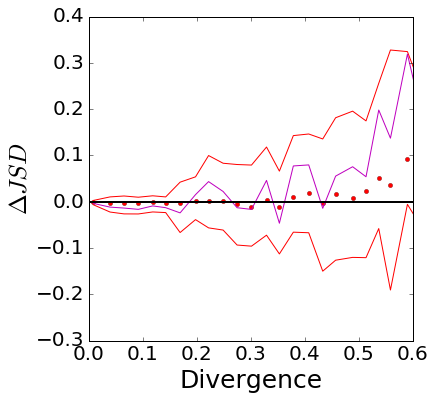

In [544]:
B = binning(Divergence,dScore,30,confinter=95)
#pl.plot(Divergence,dScore,'.',alpha=0.2)
fit = S.linregress(Divergence,dScore)
print fit
pl.scatter(B['bins'],B['mean'],color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')

pl.plot(B['bins'],B['percUp'] + B['percDown'],'m-')

#pl.plot(Divergence,Divergence*fit[0]+fit[1],'k-')
pl.plot(Divergence,np.zeros_like(Divergence),'k-')
pl.xlabel("Divergence")
pl.ylabel("$\Delta JSD$")
pl.xlim(0,0.6)
#pl.ylim(-0.05,0.05)
pl.savefig(dir + "Figures/delta_JSD_vs_divergence_%s.eps"%treatment)

-0.000524731422841 0.0 0.0323101988579


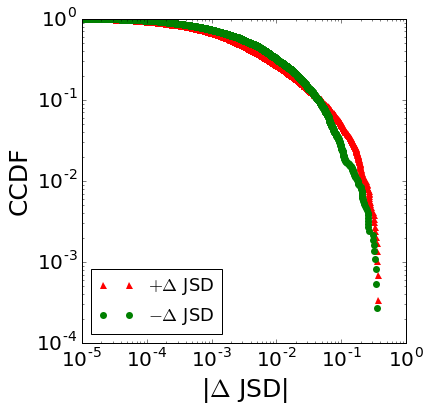

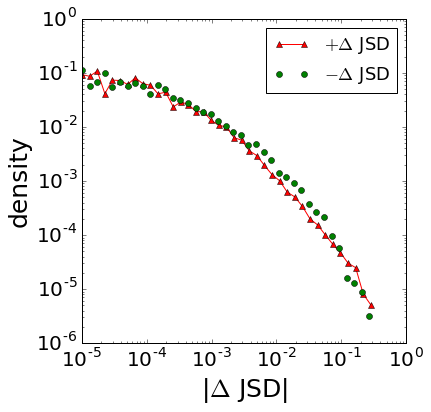

In [618]:
numbins = 40
c0 = (I > 000 )*(dDivergence > -1)*(dDivergence < 1)

cond = c0
print np.mean(dScore[cond]),np.median(dScore[cond]),np.std(dScore[cond])

cond = c0*(dScore > 10**-5)
bins = np.logspace(np.log10(min(dScore[cond])),np.log10(max(dScore[cond])),numbins)

pl.figure(1)
x,y = rankorder(dScore[cond])
#x[x < 0.000001] = 0.000001
pl.loglog(x,y/float(y[-1]),'r^',label="$+\Delta$ JSD",ms=7,mew=0)
#x,y = rankorder(-dScore[cond])
#x[x < 0.000001] = 0.000001
#pl.loglog(x,y/float(y[-1]),'go-',label="$-\Delta$ JSD",ms=5)


pl.figure(2)

H = np.histogram(dScore[cond],bins = bins,density=True)
x = np.array(H[1][:-1])
y  = np.array(H[0]/float(np.sum(H[0])))

cond = (x > 0)*(y > 0)
lx = np.log10(x[cond])
ly = np.log10(y[cond])
#B = binning(lx,ly,20)
pl.loglog(10**lx,10**ly,'r^',label="$+\Delta$ JSD")
#pl.loglog(10**B['bins'],B['mean'],'r-',label="$+\Delta$ JSD")
pl.ylabel("ccdf")
pl.xlabel("|$\Delta$ JSD|")

cond = c0*(dScore < -10**-5)

pl.figure(1)
x,y = rankorder(-dScore[cond])
#x[x < 0.000001] = 0.000001
pl.loglog(x,y/float(y[-1]),'go',label="$-\Delta$ JSD",ms=7,mew=0)
pl.xlim(xmin=0.00001)
pl.legend(loc=0)


bins = np.logspace(np.log10(min(-dScore[cond])),np.log10(max(-dScore[cond])),numbins)
H = np.histogram(-dScore[cond],bins = bins,density=True)
x = np.array(H[1][:-1])
y  = np.array(H[0]/float(np.sum(H[0])))

pl.xlabel("|$\Delta$ JSD|")
pl.ylabel("CCDF")
pl.savefig(dir + "Figures/ccdf_divergence_%s_loglog.eps"%treatment)


pl.figure(2)
cond = (x > 0)*(y > 0)
lx = np.log10(x[cond])
ly = np.log10(y[cond])

#B = binning(lx,ly,20)
pl.loglog(10**lx,10**ly,'go',label="$-\Delta$ JSD")

#cond = lx < -2.5
#fit = S.linregress(lx[cond],ly[cond])
#print fit
#pl.loglog(10**lx[cond],10**(lx[cond]*fit[0] + fit[1]),'k-')

#pl.loglog(10**lx,10**ly,'go',label="$-\Delta$ JSD")
#cond = lx > -2.5
#fit = S.linregress(lx[cond],ly[cond])
#print fit
#pl.loglog(10**lx[cond],10**(lx[cond]*fit[0] + fit[1]),'k-')

#pl.loglog(10**B['bins'],B['mean'],'g-',label="$-\Delta$ JSD")

pl.ylabel("density")
pl.xlabel("|$\Delta$ JSD|")
pl.legend(loc=0)
pl.savefig(dir + "Figures/density_divergence_%s_loglog.eps"%treatment)

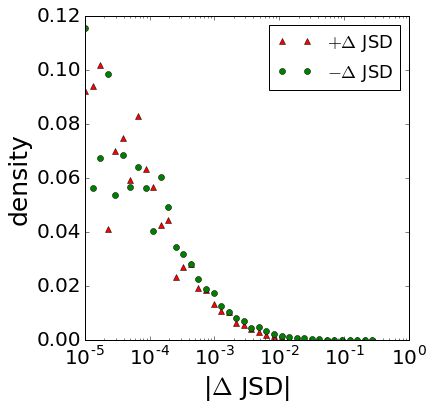

In [617]:
cond = c0*(dScore > 10**-5)
H = np.histogram(dScore[cond],bins = bins,density=True)
x = np.array(H[1][:-1])
y  = np.array(H[0]/float(np.sum(H[0])))

pl.semilogx(x,y,'r^',label="$+\Delta$ JSD")

cond = c0*(dScore < 10**-5)
H = np.histogram(-dScore[cond],bins = bins,density=True)
x = np.array(H[1][:-1])
y  = np.array(H[0]/float(np.sum(H[0])))
pl.semilogx(x,y,'go',label="$-\Delta$ JSD")

pl.ylabel("density")
pl.xlabel("|$\Delta$ JSD|")
pl.legend(loc=0)
pl.savefig(dir + "Figures/density_divergence_%s_loglin.eps"%treatment)

In [613]:
pl.loglog?

LinregressResult(slope=0.10309943598348446, intercept=-0.0001064882928918944, rvalue=0.22589099479207095, pvalue=1.0103982046637297e-126, stderr=0.0042491017484166628)
-0.00368494645396 -0.000486404193924
-0.000261280858005 0.0
0.0710791089539 0.0324413819599 

LinregressResult(slope=0.28627611014275517, intercept=-0.00083333504059710363, rvalue=0.22985688296583195, pvalue=7.0529078674636466e-126, stderr=0.011832888308810059)


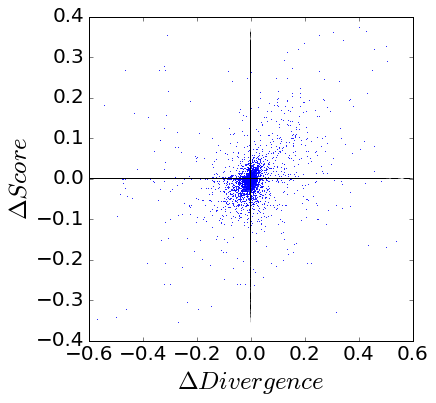

In [547]:
pl.plot(dDivergence,dScore,'.',alpha=1,ms=1)
B = binning(dDivergence,dScore,30,confinter=25)
#pl.plot(B['bins'],B['mean'],'ro')
#pl.plot(B['bins'],B['percUp'],'r-')
#pl.plot(B['bins'],B['percDown'],'r-')
fit = S.linregress(dDivergence,dScore)
print fit
#pl.plot(dDivergence,dDivergence*fit[0]+fit[1],'k-')
pl.plot(dDivergence,np.zeros_like(Divergence),'k--',lw=0.2)
pl.plot(np.zeros_like(dScore),dScore,'k--',lw=0.2)
pl.xlabel("$\Delta Divergence$")
pl.ylabel("$\Delta Score$")
pl.xlim(-0.6,0.6)
pl.ylim(-0.4,0.4)

print np.mean(dDivergence),np.mean(dScore)
print np.median(dDivergence),np.median(dScore)
print np.std(dDivergence),np.std(dScore),"\n"
cond = (dDivergence < 0.1)*(dDivergence > -0.1)
fit = S.linregress(dDivergence[cond],dScore[cond])
print fit
#pl.plot(dDivergence,dDivergence*fit[0]+fit[1],'y-')
pl.savefig(dir + "Figures/delta_score_vs_delta_divergence_%s.eps"%treatment)

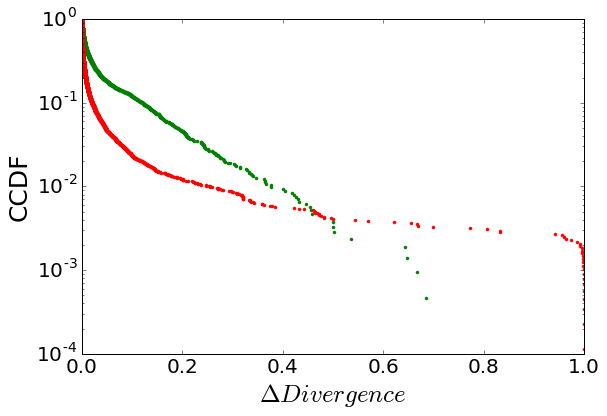

In [548]:
pl.figure(1,(9,6))
dD = dDivergence
cond = dD > 0
x,y = rankorder(dD[cond])
pl.semilogy(x,y/float(y[-1]),'g.')
#pl.loglog(x,y/float(y[-1]),'g.')

cond = dD < 0
x,y = rankorder(-dD[cond])
pl.semilogy(x,y/float(y[-1]),'r.')
#pl.loglog(x,y/float(y[-1]),'r.')

pl.xlabel("$\Delta Divergence$")
pl.xlim(xmin=10**-6)
pl.ylabel("CCDF")

LinregressResult(slope=-2.7973238059164758, intercept=1.6094024272325491, rvalue=-0.45744898995357824, pvalue=0.0, stderr=0.052295463884216895)


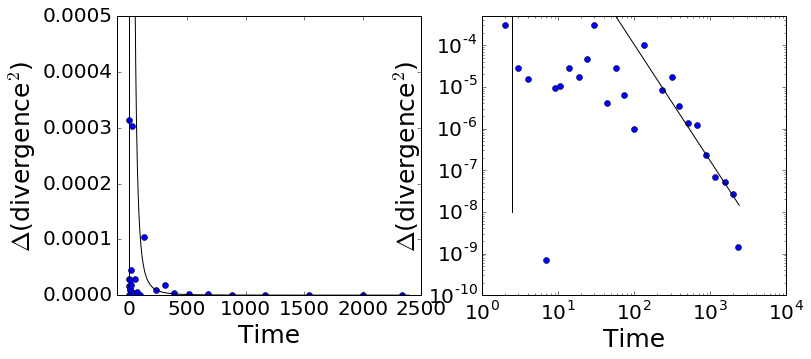

In [549]:
pl.figure(1,(12,5))
pl.subplot(121)
cond = (I > 0)*(dDsquared > 0)
lx = np.log10(I[cond])
ly = np.log10(dDsquared[cond])
B = binning(lx,ly,30)
fit = S.linregress(lx,ly)
print fit
#pl.plot(10**lx,10**ly,'o')
pl.plot(10**B['bins'],10**B['mean'],'bo')
pl.plot(10**np.sort(lx),10**(np.sort(lx)*fit[0]+fit[1]),'k-')

yStart = np.linspace(0,0.001,10)
xStart = np.zeros_like(yStart) + np.log10(60*5)
pl.plot(xStart,yStart,'k-')
pl.xlabel("Time")
pl.ylabel("$\Delta$(divergence$^2$)")
pl.ylim(ymax = 0.0005)
pl.xlim(xmin=-100)

pl.subplot(122)
pl.loglog(10**B['bins'],10**B['mean'],'bo')
pl.loglog(10**np.sort(lx),10**(np.sort(lx)*fit[0]+fit[1]),'k-')

yStart = np.logspace(-8,-3,10)
xStart = np.zeros_like(yStart) + np.log10(60*5)
pl.loglog(xStart,yStart,'k-')
pl.ylim(ymax = 0.0005)
pl.xlabel("Time")
pl.ylabel("$\Delta$(divergence$^2$)")

pl.savefig(dir + "Figures/msd_divergence_%s.eps"%treatment)

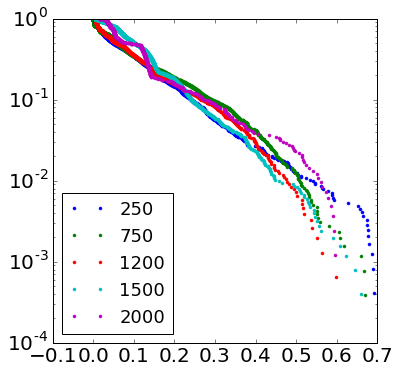

In [550]:
condition = [250, 750, 1200, 1500, 2000, 2200]
for c,cx in enumerate(condition[:-1]):
    cond = (I > cx)*(I < condition[c+1])
    x,y = rankorder(Divergence[cond])
    pl.semilogy(x,y/float(y[-1]),'.',label=cx)

pl.legend(loc=0)

SpearmanrResult(correlation=0.15032218185751134, pvalue=5.1416395842520312e-35)
LinregressResult(slope=-1.4283824996362737, intercept=1.3067763819288598, rvalue=-0.95061748748112929, pvalue=4.5893895503621626e-10, stderr=0.11310632940087523)
LinregressResult(slope=-0.19431481989054389, intercept=-1.6299526341199422, rvalue=-0.53476538759571612, pvalue=0.018322494091482424, stderr=0.074468941481711085)


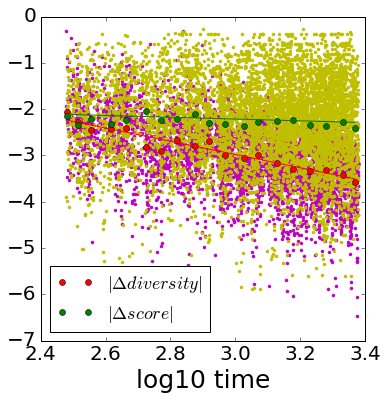

In [497]:
cond = (I > 300)*(dDiversity !=0)*(dScore !=0)*(np.abs(dScore) > 10**-6)*(np.logical_not(np.isnan(dDiversity)))*(np.logical_not(np.isnan(dScore)))
lx = np.log10(I[cond])
ly = np.log10(np.abs(dDiversity[cond]))
lz = np.log10(np.abs(dScore[cond]))
lzz = np.log10(Score[cond])

print S.spearmanr(dDiversity[cond],Score[cond])

Bdiversity = binning(lx,ly,30)
Bscore = binning(lx,lz,30)

fitDiversity = S.linregress(Bdiversity['bins'],Bdiversity['median'])
print fitDiversity
fitScore = S.linregress(Bscore['bins'],Bscore['median'])
print fitScore

pl.plot(lx,ly,'m.')
pl.plot(lx,lz,'y.')

pl.plot(Bdiversity['bins'],Bdiversity['mean'],'ro', label="$|\Delta diversity|$")
pl.plot(Bdiversity['bins'],Bdiversity['bins']*fitDiversity[0]+fitDiversity[1],'r-')
pl.plot(Bscore['bins'],Bscore['mean'],'go',label = "$|\Delta score|$")
pl.plot(Bscore['bins'],Bscore['bins']*fitScore[0]+fitScore[1],'g-')

pl.legend(loc=0)
pl.xlabel("log10 time")

3934
LinregressResult(slope=4.3944914624471547, intercept=10.691669856789897, rvalue=0.60482216724954596, pvalue=0.00050992116526526901, stderr=1.1135476040031342)


3203
LinregressResult(slope=5.5971975044131721, intercept=14.379208078774507, rvalue=0.74672643553682427, pvalue=3.2837321042565557e-06, stderr=0.95947707182196496)


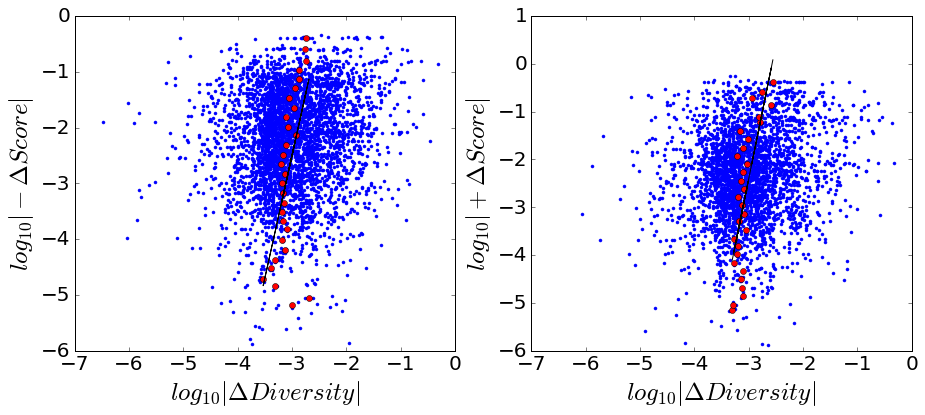

In [499]:
pl.figure(1,(15,6))
pl.subplot(121)
cond = (np.abs(dScore) > 10**-6)*(np.logical_not(np.isnan(dDiversity)))*(dScore < 0)

lx = np.log10(np.abs(dScore)[cond])
ly = np.log10(np.abs(dDiversity)[cond])

print len(lx)

B = binning(lx,ly,30)
#fit = S.linregress(ly,lx)
#print fit
fit = S.linregress(B['median'],B['bins'])
print fit


pl.plot(ly,lx,'.')
pl.plot(B['median'],B['bins'],'ro')
pl.plot(B['median'],B['median']*fit[0] + fit[1],'k-')
pl.ylabel("$log_{10}|-\Delta Score|$")
pl.xlabel("$log_{10}|\Delta Diversity|$")

print "\n"
pl.subplot(122)
cond = (np.abs(dScore) > 10**-6)*(np.logical_not(np.isnan(dDiversity)))*(dScore > 0)

lx = np.log10(np.abs(dScore)[cond])
ly = np.log10(np.abs(dDiversity)[cond])

print len(lx)

B = binning(lx,ly,30)
#fit = S.linregress(ly,lx)
#print fit
fit = S.linregress(B['median'],B['bins'])
print fit


pl.plot(ly,lx,'.')
pl.plot(B['median'],B['bins'],'ro')
pl.plot(B['median'],B['median']*fit[0] + fit[1],'k-')
pl.ylabel("$log_{10}|+\Delta Score|$")
pl.xlabel("$log_{10}|\Delta Diversity|$")

In [478]:
print MixedN(V)
print N_point_JSD(V)
print Diversity(V)

[ 0.17425933  0.19995344  0.02968222  0.01615929  0.04617102  0.00116602
  0.4290562   0.10355247]
1.35868374085
0.349687383809


In [458]:
ls = V
lamb = 1.0/len(ls)
total = np.zeros(np.shape(V)[1])

In [466]:
test = list(v)
TEST = []

In [469]:
TEST.append(test)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)


LinregressResult(slope=0.038557049031995867, intercept=-2.8487213724831171, rvalue=0.2806457167122659, pvalue=0.14030196209336671, stderr=0.02537753321942136)


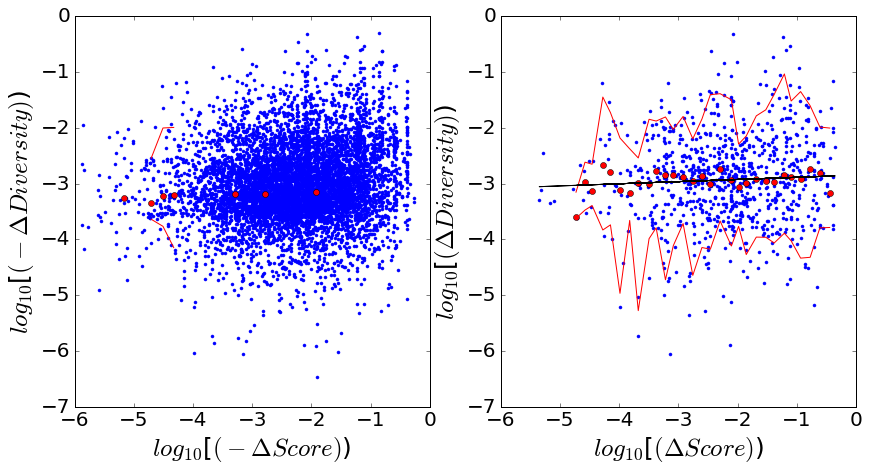

In [104]:
pl.figure(1,(14,7))
pl.subplot(121)
cond = (np.abs(dScore) > 10**-6)

lx = np.log10(np.abs(dScore[cond]))
ly = np.log10(np.abs(dDiversity[cond]))

B = binning(lx,ly,30)
#fit = S.linregress(lx,ly)
#print fit
fit = S.linregress(B['bins'],B['median'])
print fit

pl.plot(lx,ly,'.')
pl.plot(B['bins'],B['median'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')
pl.plot(lx,lx*fit[0]+fit[1],'k-')
pl.xlabel("$log_{10}$[$(- \Delta Score)$)")
pl.ylabel("$log_{10}$[$(- \Delta Diversity)$)")

print "\n"
pl.subplot(122)
cond = (np.abs(dScore) > 10**-6)*(dScore > 0)*(dDiversity > 0)

lx = np.log10(np.abs(dScore[cond]))
ly = np.log10(np.abs(dDiversity[cond]))

B = binning(lx,ly,30)
#fit = S.linregress(lx,ly)
#print fit
fit = S.linregress(B['bins'],B['median'])
print fit

pl.plot(lx,ly,'.')
pl.plot(B['bins'],B['median'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')
pl.plot(lx,lx*fit[0]+fit[1],'k-')
pl.xlabel("$log_{10}$[$(\Delta Score)$)")
pl.ylabel("$log_{10}$[$(\Delta Diversity)$)")

LinregressResult(slope=0.19799565961791726, intercept=-1.6734917409997143, rvalue=0.14163139463678068, pvalue=3.0981596922755607e-31, stderr=0.016945939194407334)


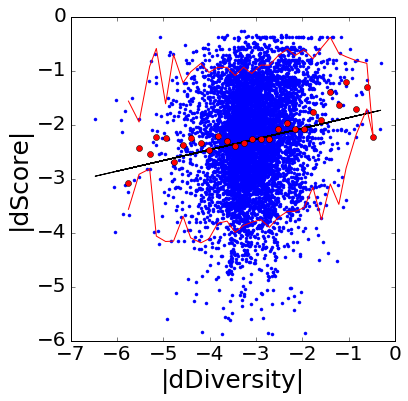

In [498]:
B = binning(ly,lz,30)
fit = S.linregress(ly,lz)
print fit
pl.plot(ly,lz,'.')
pl.plot(ly,ly*fit[0] + fit[1],'k-')
pl.plot(B['bins'],B['median'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')

pl.xlabel("|dDiversity|")
pl.ylabel("|dScore|")

In [125]:
final_simple = np.array(simple_distances)[-1]
final_complex = np.array(complex_distances)[-1]

In [132]:
treatment = "complex"
data_dic = pd.read_pickle(dir + "Data/%s_models"%treatment)

with open(dir + 'Data/%sG'%treatment, 'r') as f:
    G = jp.decode(f.read())

### 1. Power Law Decay of JS-Distance

max:  0.436577411083 0.966666666667
0 LinregressResult(slope=-0.19072923883638668, intercept=-0.37178378741619661, rvalue=-0.83821356019767246, pvalue=0.0, stderr=0.0025435668519690146)
max:  0.392338193912 5.01666666667
1 LinregressResult(slope=-0.19041474109710405, intercept=-0.41975712108384655, rvalue=-0.86547458548267076, pvalue=0.0, stderr=0.0023402503242950872)


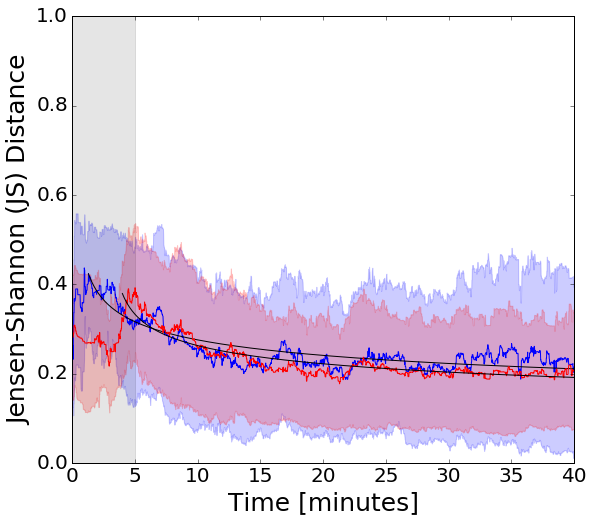

In [335]:
simple_distances = loadDistances(treatment="simple",distanceType='sqrt',remove_duplicates=False)
complex_distances = loadDistances(treatment="complex",distanceType='sqrt',remove_duplicates=False)

pl.figure(1,(9,8))
color = ["blue","red"]
tc = [0.3,3]
for k,kx  in enumerate([simple_distances,complex_distances][:]):
    #array = np.array(dfSimpleLearning)

    array = np.array(kx)
    X = []
    Y = []
    mean = []
    median = []
    std = []
    points = []
    percDown = []
    percUp = []
    
    for i,ix in enumerate(array):
        cond = np.logical_not(np.isnan(ix))
        
        if not len(ix[cond]):
            continue
        
        y = ix[cond]
        x = np.zeros_like(y)+i
        X = np.append(X,x)
        Y = np.append(Y,y)
        median = np.append(median,np.median(ix[cond]))
        mean  = np.append(mean,np.mean(ix[cond]**2))
        std = np.append(std,np.std(ix[cond]))
        points = np.append(points,float(len(ix[cond])))
        percDown = np.append(percDown,np.percentile(ix[cond],1))
        percUp = np.append(percUp,np.percentile(ix[cond],99))
      
    #print y
    #pl.figure(3)
    #B = binning(X,Y,500)
    #pl.plot(B['bins'],B['mean'],'.',color=color[k])
    
    print "max: ",np.max(mean),np.argmax(mean)/60.
    
    pl.figure(1)
    t = np.arange(1,len(mean)+1)/60.
    pl.plot(t,mean,color=color[k])
    pl.fill_between(t,mean-std,mean+std,color=color[k],alpha = 0.2)
    #pl.plot(t,percDown,'-.',color=color[k])
    #pl.plot(t,percUp,'-.',color=color[k])
    
    xShade = np.arange(0,6)
    pl.fill_between(xShade,np.zeros_like(xShade),np.zeros_like(xShade)+1,color="k",alpha=0.05)
    
    
    
    for j,jx in enumerate([mean,percDown,mean-std,mean+std][:1]):
        t = t - tc[k] + 1
        y = jx
        cond = (t > 1)*(y > 0)
        lt = np.log10(t[cond])
        ly = np.log10(y[cond])

        fit = S.linregress(lt,ly)
        print k,fit

        pl.plot(10**lt+tc[k],10**(lt*fit[0]+fit[1]),'k-')

    
pl.figure(1)    
pl.xlabel("Time [minutes]")
pl.ylabel("Jensen-Shannon (JS) Distance")
pl.xlim(0,40)
#pl.ylim(0.25,0.85)
pl.savefig(dir + "Figures/decay_simple_complex.eps")

### Distribution of JS distance Jump Sizes

In [29]:
simple_distances = loadDistances(treatment="simple",remove_duplicates=True)
complex_distances = loadDistances(treatment="complex",remove_duplicates=True)


simple treatment
0.0
[ 0.  0.]
[ 0.  0.]
[-0.02938281  0.01412159]
negative JS distance: 
LinregressResult(slope=-1.1376997680202301, intercept=-5.4619579503431597, rvalue=-0.90394660040574659, pvalue=1.4636579928606038e-37, stderr=0.054649070370008136)
positive JS distance: 
LinregressResult(slope=-1.5464668071594736, intercept=-6.2838712283635498, rvalue=-0.94592686007109361, pvalue=9.4823052244586086e-48, stderr=0.054698216933635573)

complex treatment
0.0
[ 0.  0.]
[ 0.  0.]
[-0.0143648   0.00691525]
negative JS distance: 
LinregressResult(slope=-1.2335044852597559, intercept=-5.8928327001812084, rvalue=-0.9275785664386339, pvalue=2.7225957855814992e-58, stderr=0.043245673537344563)
positive JS distance: 
LinregressResult(slope=-1.5030644976529661, intercept=-6.4287155410938226, rvalue=-0.93065306075983179, pvalue=1.5162505229956753e-55, stderr=0.053284760589504453)


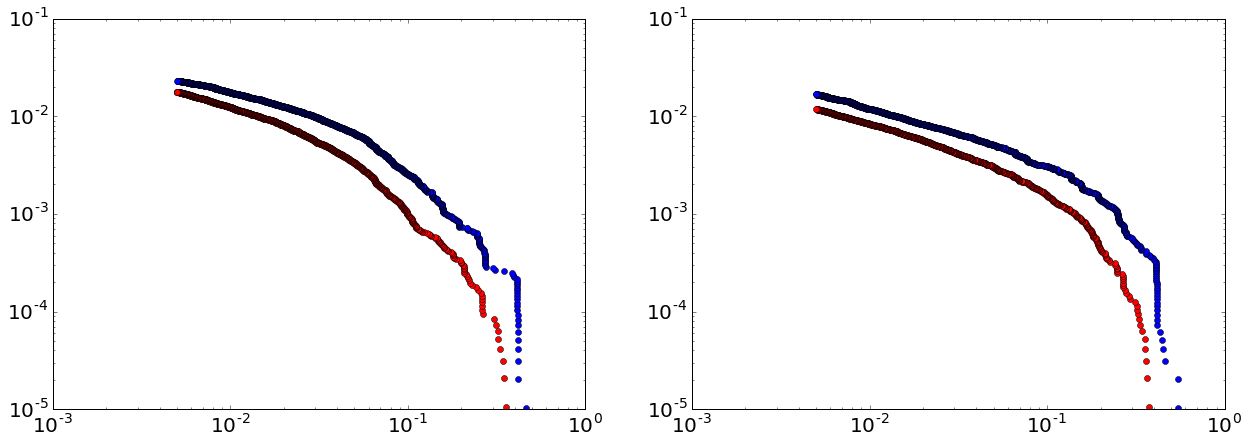

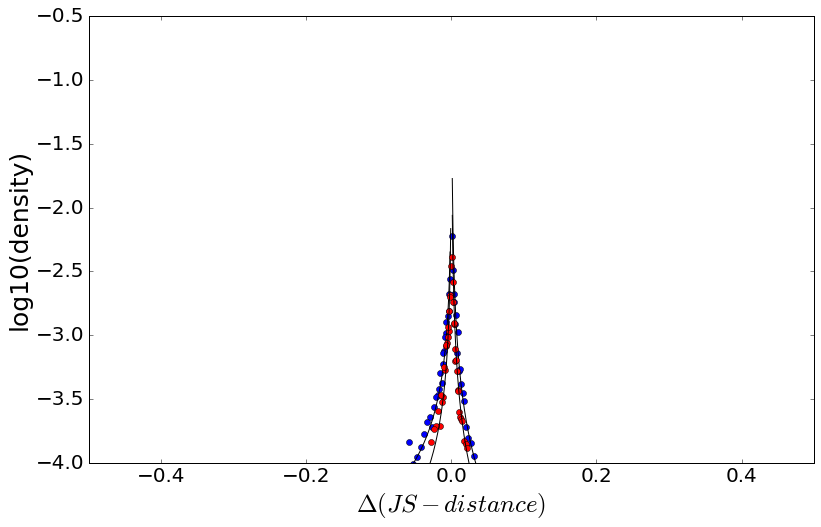

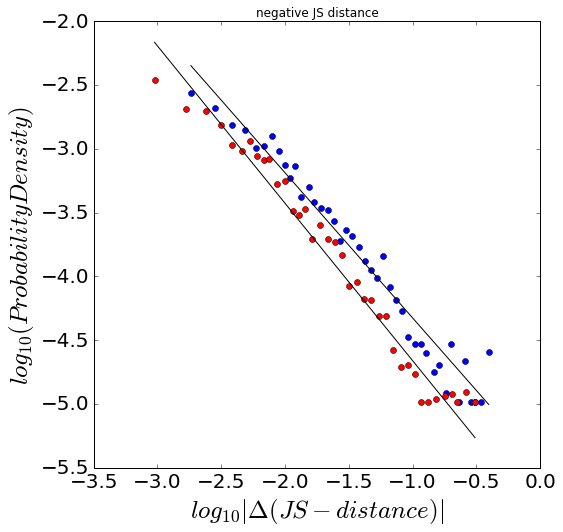

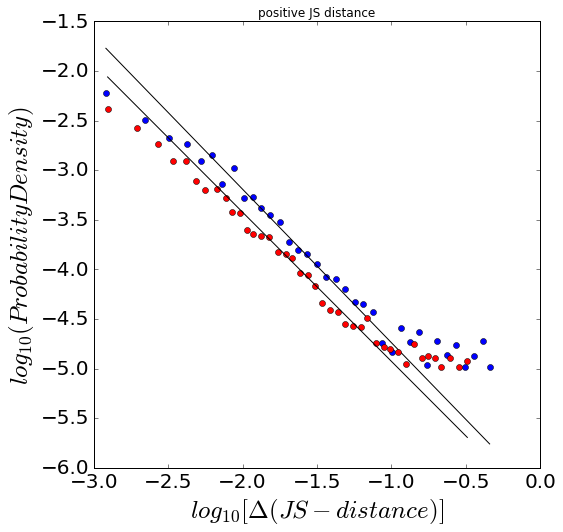

In [227]:
numbins = 50
#pl.figure(1,(9,7))
color = ["blue","red"]
for k,kx  in enumerate([simple_distances,complex_distances][:]):
    
    if k==0:
        print "\nsimple treatment"
    elif k == 1:
        print "\ncomplex treatment"
 

    array = np.array(zip(*np.array(kx)))
    
    deltaJSd = [] 
    for i,ix in enumerate(array):
        cond = np.logical_not(np.isnan(ix))
        
        if not len(ix[cond]):
            continue
            
        y = np.diff(ix[cond])[:]
        deltaJSd = np.append(deltaJSd,y)
    
    
    #cond = (deltaJSd < 0)*(deltaJSd >= -0.01)
    #deltaJSd[cond] = 0.00
    
    #cond = (deltaJSd > 0)*(deltaJSd <= 0.01)
    #deltaJSd[cond] = 0.00
    
    pl.figure(1,(21,7))

    pl.subplot(121)
    x,y = rankorder(-deltaJSd)
    cond = x > 0.005
    pl.loglog(x[cond],y[cond]/float(y[-1]),'o',color=color[k])
    
    pl.subplot(122)
    x,y = rankorder(deltaJSd)
    cond = x > 0.005
    pl.loglog(x[cond],y[cond]/float(y[-1]),'o',color=color[k])
    

    
    
    
    pl.figure(2,(13,8))
    pl.xlabel("$\Delta(JS-distance)$")
    pl.ylabel("log10(density)")
    pl.xlim(-0.5,0.5)
    pl.ylim(-4,-0.5)
    
    
    H = np.histogram(deltaJSd,bins=1000)
    x = H[1][1:]
    y = H[0]/float(np.sum(H[0]))
    
    print np.median(deltaJSd)
    print np.percentile(deltaJSd,(25,75))
    print np.percentile(deltaJSd,(5,95))
    print np.percentile(deltaJSd,(1,99))
    
    # negative JS distance
    cond = (x < 0)*(y > 0)
    lx = np.log10(-x[cond])
    ly = np.log10(y[cond])
    condFit = (lx > -4.5)*(lx < -1.)
    #condFit = (lx > -3.5)*(lx < -2)
    fit = S.linregress(lx[condFit],ly[condFit])
    print "negative JS distance: \n" , fit
    B = binning(lx,ly,numbins)
    #pl.plot(x[cond],ly,'o',color=color[k])
    pl.plot(-10**B['bins'],B['mean'],'o',color=color[k])
    
    #pl.plot(-10**B['bins'],B['percUp'],'-',color=color[k])
    #pl.plot(-10**B['bins'],B['percDown'],'-',color=color[k])
    
    pl.plot(-10**B['bins'],B['bins']*fit[0]+fit[1],'k-')

    
    pl.figure(3,(8,8)) ## loglog panel negative JS distance
    pl.title("negative JS distance")
    #pl.plot(lx,ly,'k.',color=color[k])
    pl.plot(B['bins'],B['mean'],'o',color=color[k])    
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-')
    pl.xlabel("$log_{10}|\Delta(JS-distance)|$")
    
    pl.ylabel("$log_{10}(Probability Density)$")

    
    # positive JS distance
    pl.figure(2)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    condFit = (lx > -4.5)*(lx < -1.)
    #condFit = (lx > -3.5)*(lx < -2)
    fit = S.linregress(lx[condFit],ly[condFit])
    
    print "positive JS distance: \n" , fit
    B = binning(lx,ly,numbins)
    #pl.plot(x[cond],ly,'o',color=color[k])
    pl.plot(10**B['bins'],B['mean'],'o',color=color[k])
    
    #pl.plot(10**B['bins'],B['percUp'],'-',color=color[k])
    #pl.plot(10**B['bins'],B['percDown'],'-',color=color[k])
    
    pl.plot(10**B['bins'],B['bins']*fit[0]+fit[1],'k-')
    
    
    pl.figure(4,(8,8)) ## loglog panel positive JS distance
    pl.title("positive JS distance")
    pl.plot(B['bins'],B['mean'],'o',color=color[k])
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-')
    pl.xlabel("$log_{10}[\Delta(JS-distance)]$")
    pl.ylabel("$log_{10}(ProbabilityDensity)$")
    

pl.figure(2)
pl.savefig(dir + "Figures/pdfJSD.eps")
pl.figure(3)
pl.savefig(dir + "Figures/pdfJSD_loglog_negative.eps")

pl.figure(4)
pl.savefig(dir + "Figures/pdfJSD_loglog_positive.eps")

### Exploration versus Performance

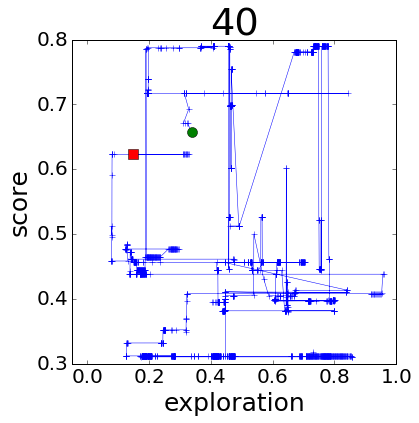

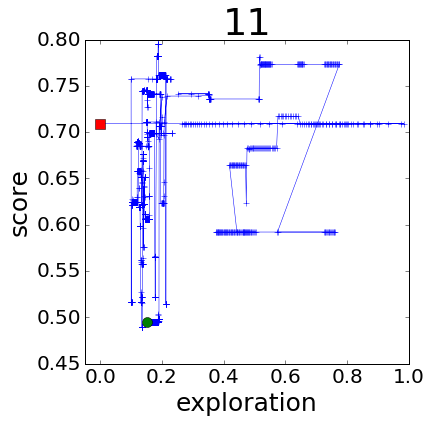

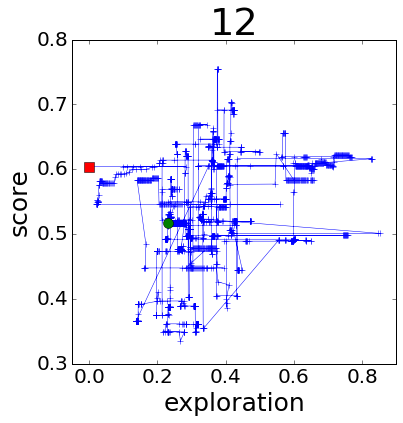

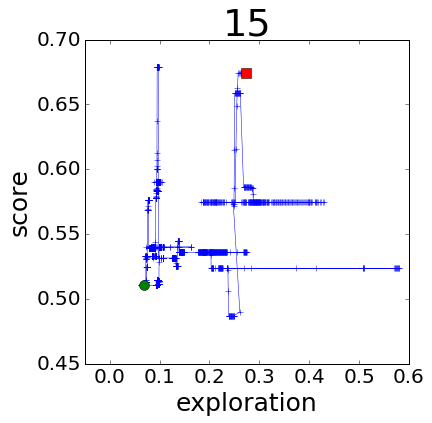

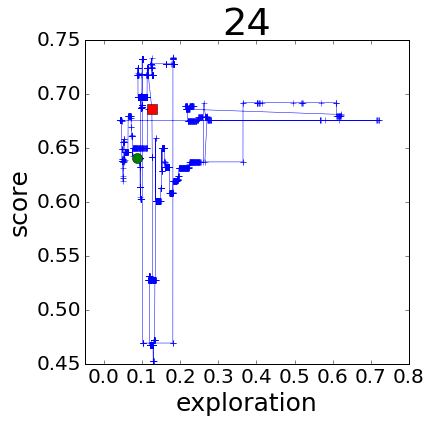

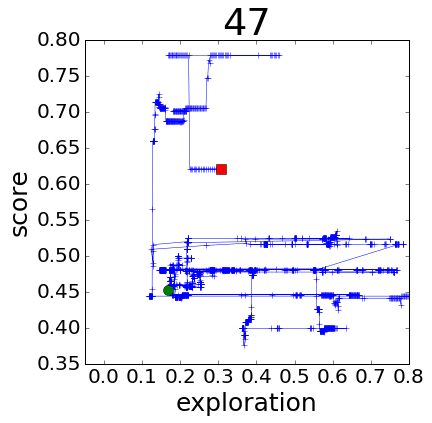

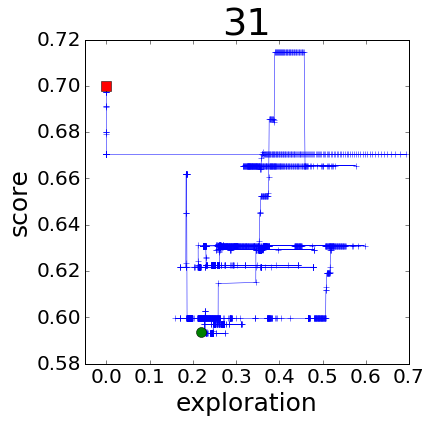

In [33]:
for i in range(48):
    score = dfAllLearning[str(i)].values[:]
    explor = dfExplor[str(i+1)].values[:]
    
    c = (~np.isnan(score))*(~np.isnan(explor))
    
    if i in [11,12,15,24,31,40,47]:
    #if i in np.arange(47,48):
        pl.figure(i)
        pl.title(i)
        pl.plot(explor[c],score[c],'+-',lw=0.5)
        pl.plot(explor[c][0],score[c][0],'rs',ms=10)
        pl.plot(explor[c][-1],score[c][-1],'go',ms=10)
        #break
        
        pl.xlabel("exploration")
        pl.ylabel("score")
        pl.xlim(xmin = -0.05)
        
        pl.savefig(dir + "Figures/score_explor_walk_%s.eps"%i)

In [11]:
simpl  = [float(x) for x in simpl]
x = np.arange(1,len(simpl)+1)
compl  = [float(x) for x in compl]

In [43]:
def prepareXY(filename,log=False):
    stringData = open(dir + "Data/%s.csv"%filename,'rb').read().split(",")
    Y = np.array([float(x) for x in stringData ])
    X = np.arange(1,len(Y)+1)
    
    if log:
        c = Y >0
        Y = np.log10(Y[c])
        X = np.log10(X[c])  
    return X,Y

LinregressResult(slope=-0.093095490681215573, intercept=-0.1215610783049937, rvalue=-0.92191054796212424, pvalue=0.0, stderr=0.00078810173292323494)
LinregressResult(slope=-0.087805313813836827, intercept=-0.056609869121337364, rvalue=-0.94593012685034195, pvalue=0.0, stderr=0.00063237876503775435)


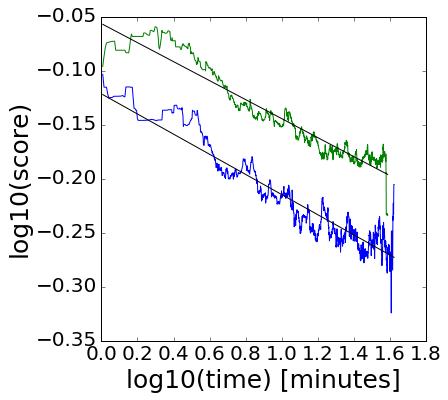

In [41]:
def plotFit(vector):
    '''Vector = {simpl,compl}'''
    y = np.array(map(float,vector))
    x = np.arange(1,len(vector)+1)/60.
    c = (x > 1)*(vector > 0)

    lx = np.log10(x[c])
    ly = np.log10(y[c])
    
    fit = S.linregress(lx,ly)
    print fit
    pl.plot(lx,ly)
    pl.plot(lx,lx*fit[0] + fit[1],'k-')
    
    pl.xlabel("log10(time) [minutes]")
    pl.ylabel("log10(score)")
    
    
plotFit(simpl)
plotFit(compl)

In [519]:
print 10**(-0.19)
print 10**(-0.17)

0.645654229035
0.676082975392


In [20]:
t = 60*24*365*275
print 0.65*t**(-0.10)
t = 60*24*365*900000
print 0.65*t**(-0.07)

#t = 60*24*1.29
#print 0.65*t**(-0.25)

0.0992920669873
0.099008049776


simple
SpearmanrResult(correlation=-0.029629045190838591, pvalue=0.011286220978352881)
LinregressResult(slope=-0.0018534263111505236, intercept=-0.00079888869284555999, rvalue=-0.079185462418874003, pvalue=0.74727455157329659, stderr=0.00565899790088948)
LinregressResult(slope=0.027264161563860134, intercept=0.48916568297158741, rvalue=0.44183703606109059, pvalue=0.058227120348702963, stderr=0.013425923418403604)
blah:  LinregressResult(slope=-0.52564222713220887, intercept=0.72096714272191731, rvalue=-0.98687673505097884, pvalue=8.6295201669461689e-109, stderr=0.0074023030706572663)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7360 but corresponding boolean dimension is 7312


power law fit : 1.9122717711 0.170871531543 137
complex
SpearmanrResult(correlation=-0.05372558732052251, pvalue=4.9734983554381477e-07)
LinregressResult(slope=-0.0062443026077720282, intercept=-0.0038386335462172474, rvalue=-0.19967925844152851, pvalue=0.42696402721710114, stderr=0.0076604733549574654)
LinregressResult(slope=0.0086213127219359649, intercept=0.56417762800291038, rvalue=0.22746964953096344, pvalue=0.36399976823571922, stderr=0.0092268424571264711)
blah:  LinregressResult(slope=-0.48833320166731142, intercept=0.69643702487352277, rvalue=-0.99127208954167534, pvalue=4.1914582544982789e-110, stderr=0.0058558677934531511)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8794 but corresponding boolean dimension is 8746


power law fit : 1.70064677644 0.1788854382 125


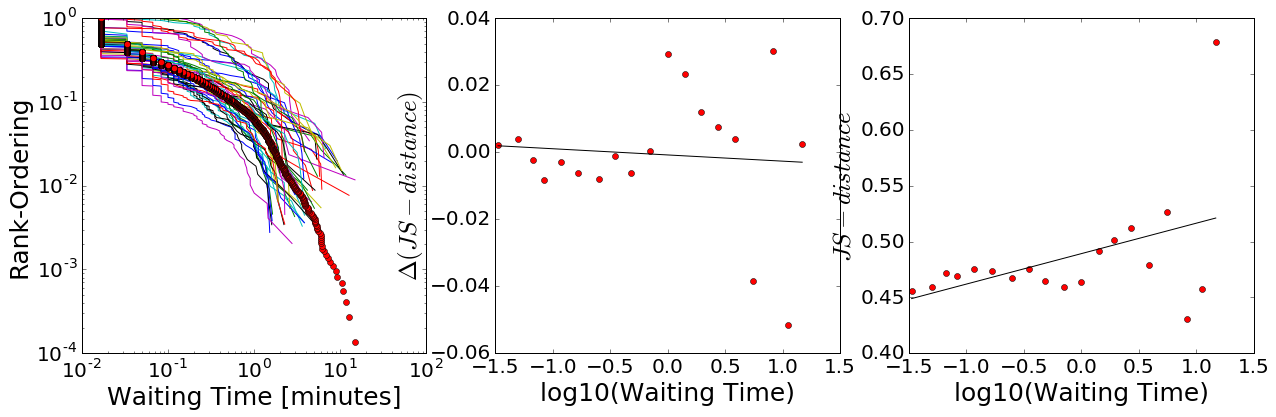

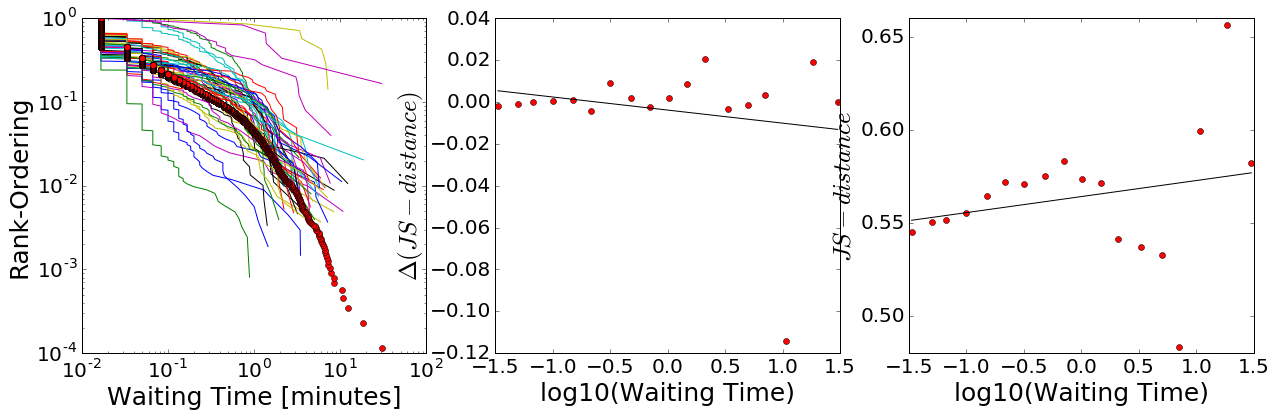

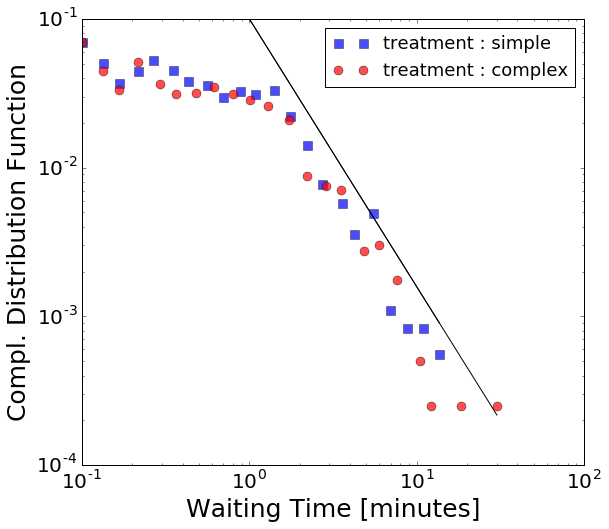

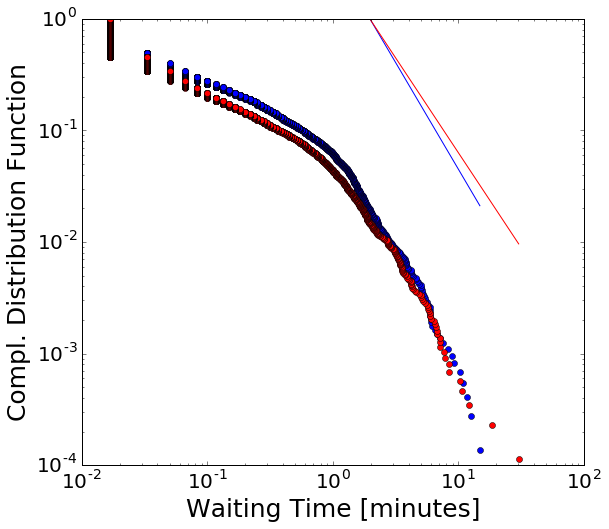

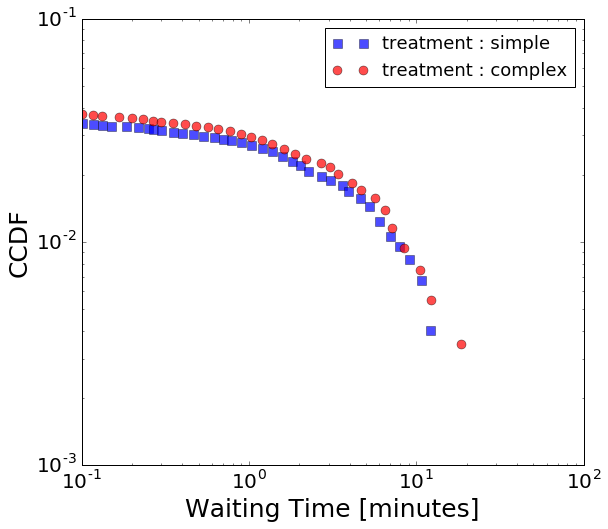

In [218]:
color = ["blue","red"]
symbol = ["s","o"]
for i,datatype in enumerate(['simple','complex']):
#datatype = "complex"

    print datatype
    test_dic = dict(loadDistances(treatment=datatype,remove_duplicates=True))
    WT = []
    JS = []
    dJS = []
    
    pl.figure(i+1,(21,6))
    for key in test_dic.keys():
        test = np.array(test_dic[key])
        index = np.argwhere(test>0)
        wt = np.concatenate([np.diff(index.flatten())])/60.
        js = test[index].flatten()
        djs = np.diff(test[index].flatten())

        pl.subplot(131)
        x,y = rankorder(wt)
        pl.loglog(x,y/float(y[-1]))
        pl.xlabel("Waiting Time [minutes]")
        pl.ylabel("Rank-Ordering")
        pl.ylim(0.0001,1)

        pl.subplot(132)
        #pl.semilogx(wt,djs,'.')
        pl.xlabel("log10(Waiting Time)")
        pl.ylabel("$\Delta(JS-distance)$")

        pl.subplot(133)
        #pl.semilogx(wt,js[1:],'.')
        pl.xlabel("log10(Waiting Time)")
        pl.ylabel("$JS-distance$")
        
        WT = np.append(WT,wt)
        JS = np.append(JS,js)
        dJS = np.append(dJS,djs)

    
        
    pl.subplot(131)
    x,y = rankorder(WT)
    pl.loglog(x,y/float(y[-1]),'ro')    
    
    pl.subplot(132)
    cond = (WT > 0)*(WT < 100)
    lWT = np.log10(WT[cond])
    B = binning(lWT,dJS[cond],20)
    
    print S.spearmanr(WT,dJS)
    
    pl.plot(B['bins'],B['mean'],'ro')
    fitB = S.linregress(B['bins'],B['mean'])
    print fitB
    pl.plot(B['bins'],B['bins']*fitB[0] + fitB[1],'k-')
    
    pl.subplot(133)
    B = binning(lWT,JS[cond],20)
    pl.plot(B['bins'],B['mean'],'ro')
    fitB = S.linregress(B['bins'],B['mean'])
    print fitB
    pl.plot(B['bins'],B['bins']*fitB[0] + fitB[1],'k-')
    
    pl.figure(5,(9,8))
    x,y = rankorder(WT)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    ly = ly/float(ly[-1])
    B = binning(lx,ly,30)
    
    cond = (lx > 0.3)
    print "blah: " ,S.linregress(lx[cond],ly[cond])
    
    pl.loglog(10**B['bins'],10**np.log10(B['nPoints']/np.sum(B['nPoints'])),'o',color=color[i],marker=symbol[i],ms=9,alpha=0.7,label="treatment : %s"%datatype)
    pl.loglog(10**B['bins'],10**(B['bins']*-1.8 - 1),'k-')
    #pl.loglog(x,y/float(y[-1]),'o',color=color[i],marker=symbol[i],label="treatment %s"%datatype)
    pl.legend(loc=0)
    pl.xlabel("Waiting Time [minutes]")
    #pl.ylabel("Probability Density Function")
    pl.ylabel("Compl. Distribution Function")
    pl.xlim(xmin=0.10)
    pl.ylim(ymax=0.10)
    pl.savefig(dir + "Figures/waiting_times_pdf.eps")
    
    
    pl.figure(6,(9,8))
    print "power law fit :",
    fitdic = plotPowerLawFit(WT,xmin=2.,continuousFit=True,addnoise=False,confint=.01,plot=False)
    pl.loglog(fitdic['x'],fitdic['y'],'o',color=color[i])
    pl.loglog(fitdic['xFit'],fitdic['yFit'],'-',color=color[i])
    pl.xlabel("Waiting Time [minutes]")
    pl.ylabel("Compl. Distribution Function")
    pl.savefig(dir + "Figures/waiting_times_ccdf.eps")
    #pl.xlim(xmin=3/60.)

    
    pl.figure(7,(9,8))
    x,y = rankorder(WT)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    ly = ly/float(ly[-1])
    B = binning(lx,ly,50)
    pl.loglog(10**B['bins'],10**np.log10(B['mean']/np.sum(B['mean'])),'o',color=color[i],marker=symbol[i],ms=9,alpha=0.7,label="treatment : %s"%datatype)
    #pl.loglog(x,y/float(y[-1]),'o',color=color[i],marker=symbol[i],label="treatment %s"%datatype)
    pl.legend(loc=0)
    pl.xlabel("Waiting Time [minutes]")
    pl.ylabel("CCDF")
    pl.xlim(xmin=0.10)
    pl.ylim(ymax=0.10)
    